# Introdução

A extração de componentes conectados é um método da morfolgia matemática, que pode ser bastante útil para análises em imagens. Em teoria um objeto é um conjunto composto por um ou mais pixels que apresentam intensidades luminosas semelhantes, ou no caso de uma imagem binária intensidade iguais e diferentes de 1. A tradução matemática para o processo de extração é a seguinte:
$$ X(k) = (X(k-1) + B) \cap A $$

A é a imagem, B o elemento estruturante e X a nova imagem ao final da detecção.

# Discussões sobre o método

A detecção de objetos conectadas é implementada da seguinte forma: (i) definir parâmetros inicias para o tipo de detecção (área, forma, convexidade e após a filtragem (ii) aponta a centróide do objeto .

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

- Abrir imagem:

In [2]:
img = np.array(cv2.imread('blob.jpg', cv2.IMREAD_GRAYSCALE))

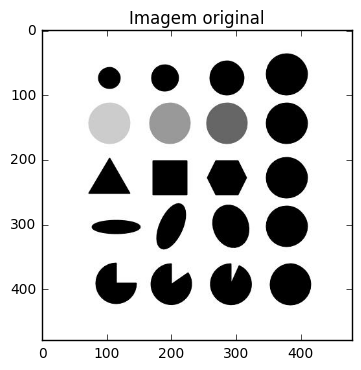

In [3]:
plt.figure(1)
plt.imshow(img, 'gray')
#plt.axis("off")
plt.title("Imagem original")
plt.show()

### Detecção de objetos conectados (Blob):

In [4]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200

# Filter by Area.
params.filterByArea = False
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87
    
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
params.maxInertiaRatio = 0.35

In [5]:
# Create a detector with the parameters

detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.

keypoints = detector.detect(img)

In [6]:
im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

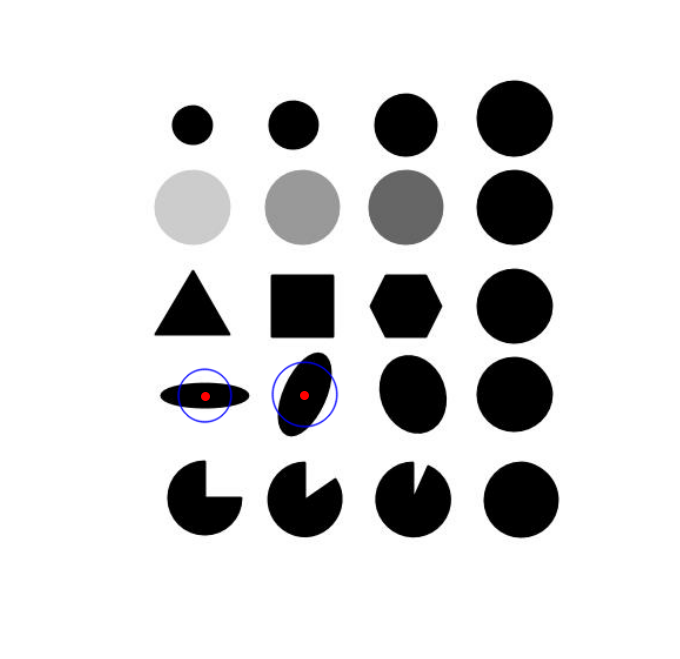

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(im_with_keypoints, 'gray')
plt.axis("off")
#plt.title("Imagem original")
#plt.scatter(keypoints[0].pt,'b')
for u in keypoints:
    plt.scatter(u.pt[0],u.pt[1], color='red', s=30)
plt.show()

# Conclusão

A detecção de objetos conectados é bastante útil para encontrar formas únicas e distintas em uma imagem. Porém, é um método para operação em imagens binárias.